In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from random import randint
import duckdb as dk
import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import SparsePCA, PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap
import seaborn as sns

input = pd.read_parquet("songs.parquet")
input.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'duration_ms_x', 'album_name',
       'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms_y', 'time_signature', 'artist_pop', 'genres', 'track_pop'],
      dtype='object')

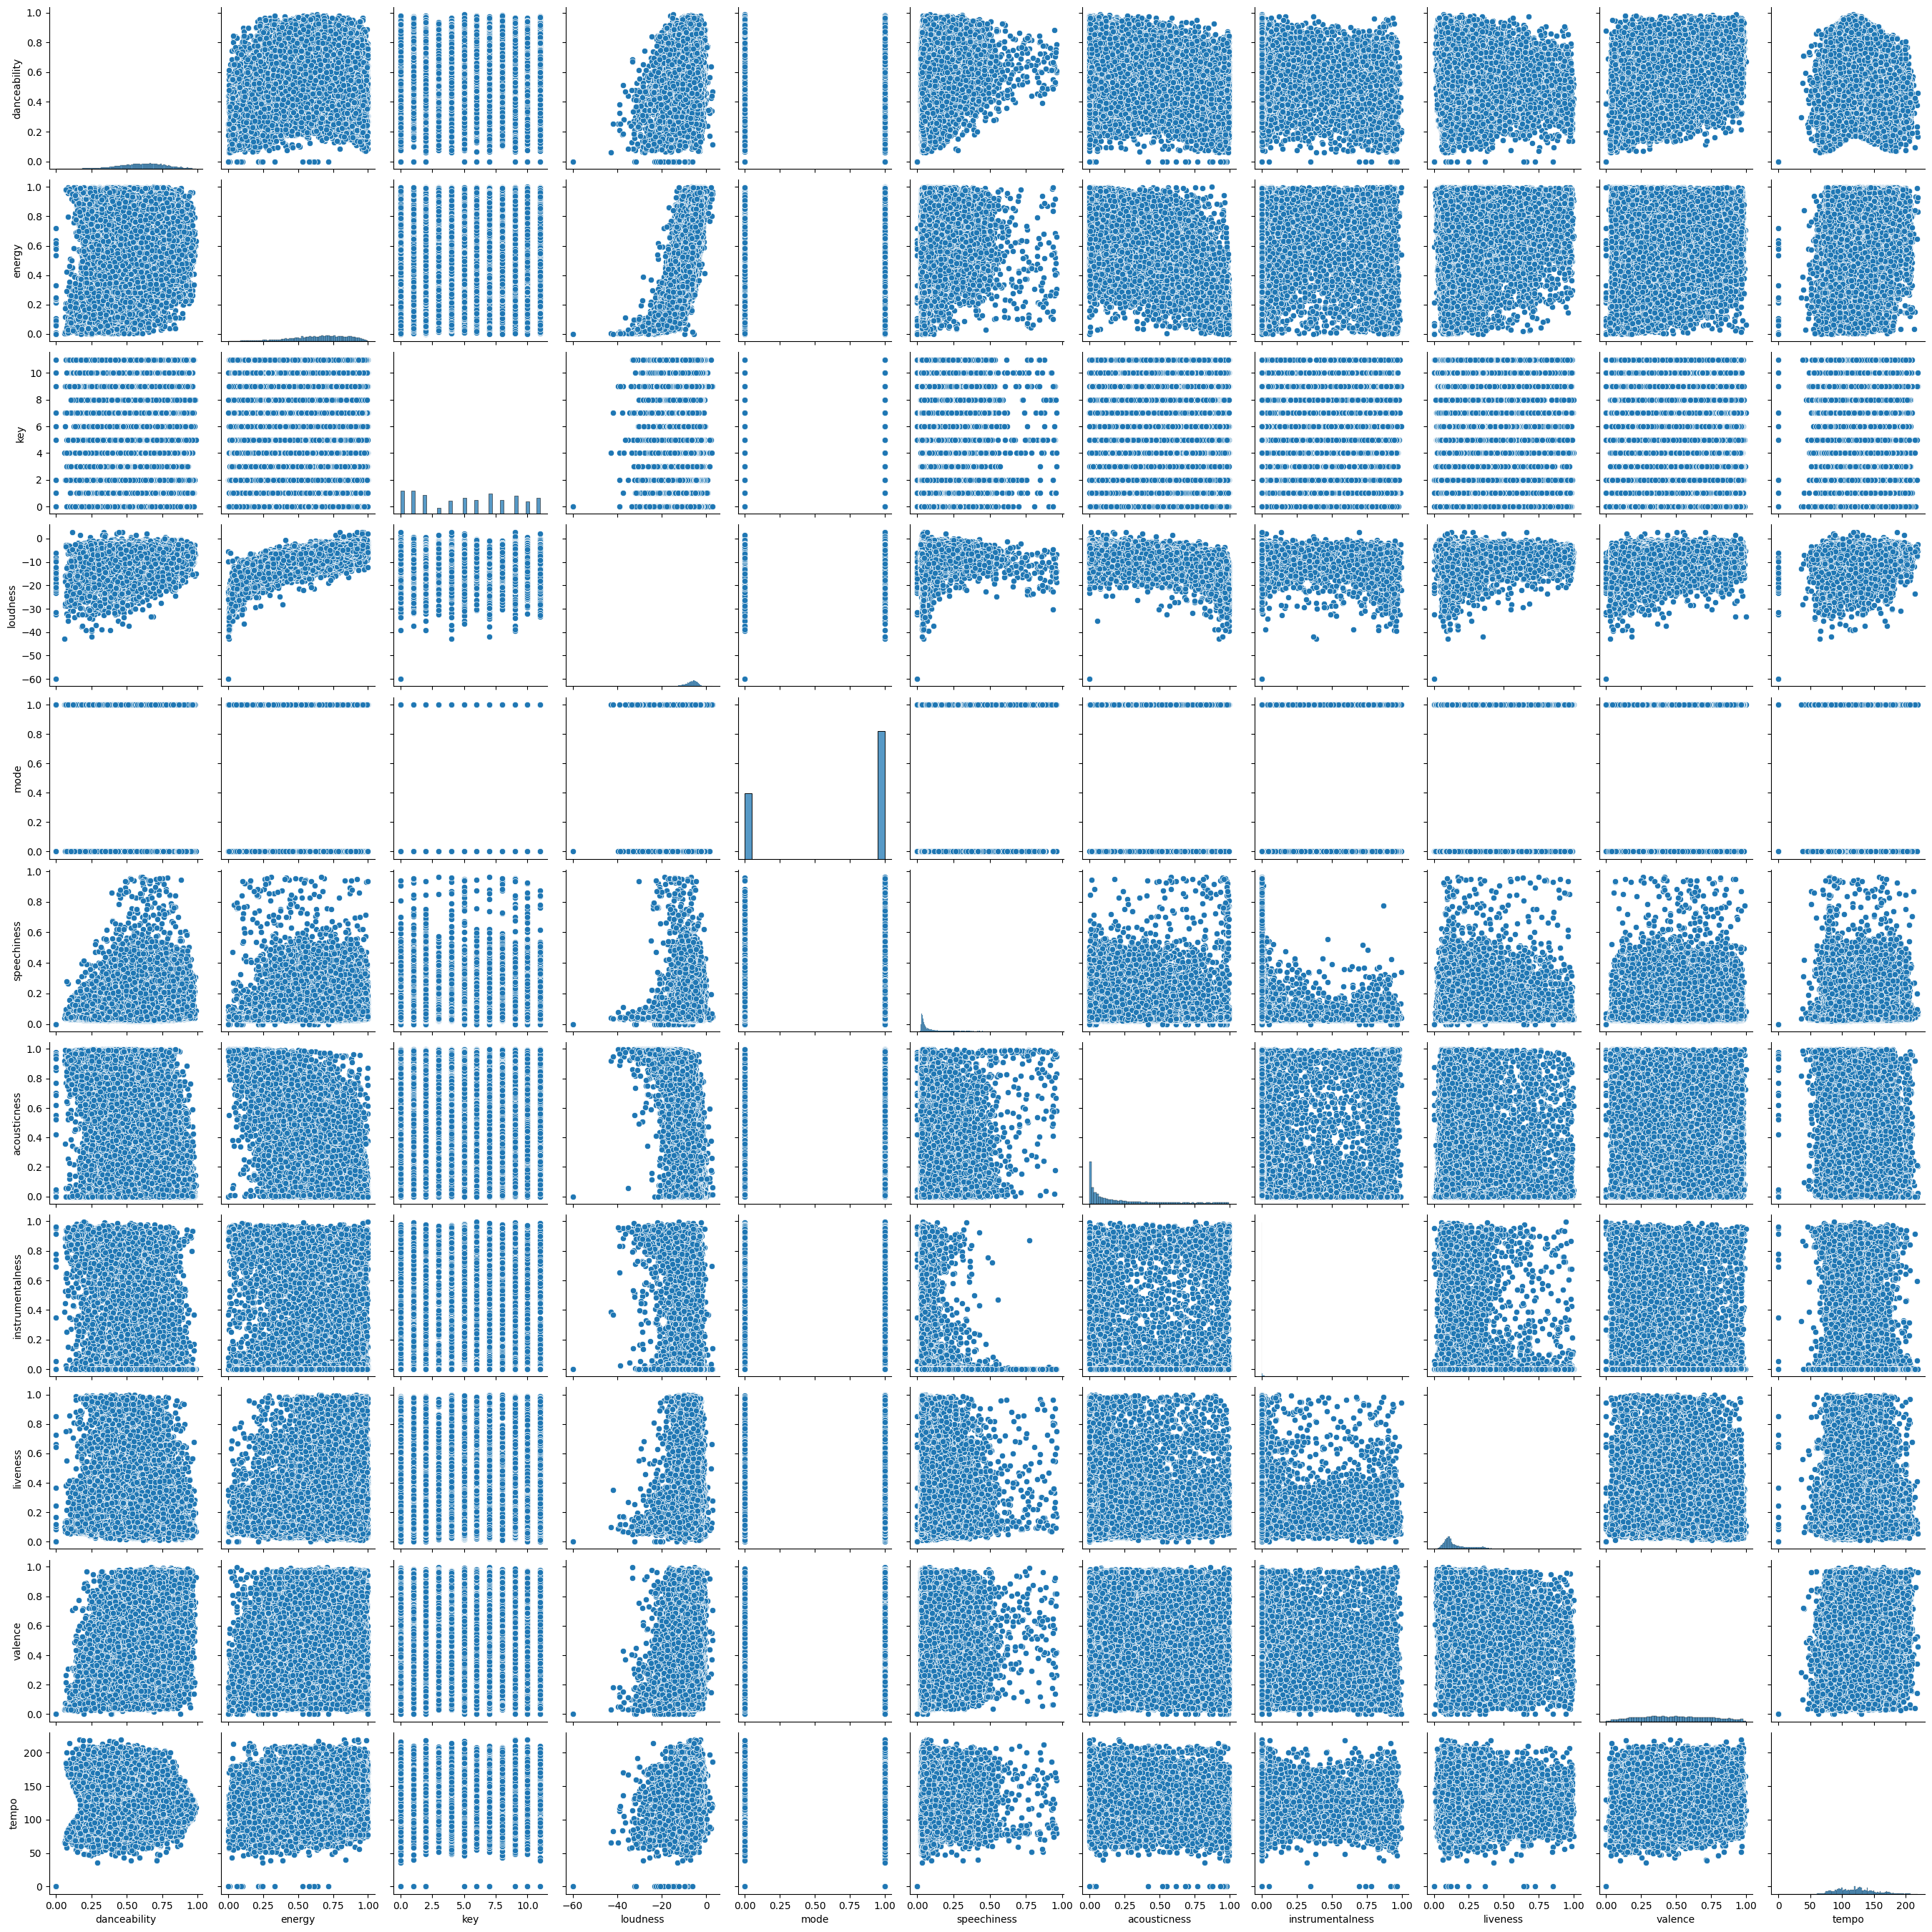

In [ ]:
data = input[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
data
sns.pairplot(data)


In [ ]:
reducer = umap.UMAP()
scaled = StandardScaler().fit_transform(data)

In [ ]:


def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

hdb = HDBSCAN()
hdb.fit(data)

HDBSCAN()

In [ ]:
embedding = reducer.fit_transform(scaled)
embedding.shape

/home/cody-barriger/github-repos/Toy-Social-Media-Dataset-Analysis/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/cody-barriger/github-repos/Toy-Social-Media-Dataset-Analysis/.venv/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


(67499, 2)

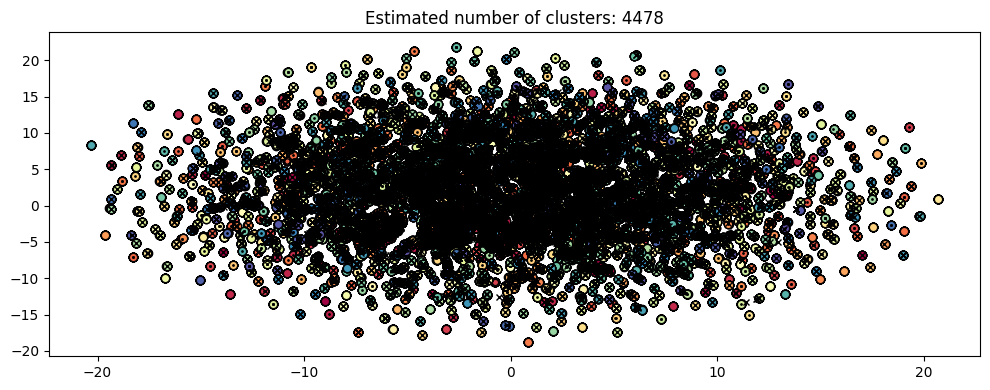

In [ ]:
plot(embedding,
        hdb.labels_,
        hdb.probabilities_,)

In [ ]:
clustered = data
clustered['label'] = hdb.labels_
sns.pairplot(clustered, hue = 'label')


KeyboardInterrupt: 